In [33]:
from miro.client import MiroApiClient
from miro.utils import get_auth_token_from_env

In [34]:
client = MiroApiClient(base_url='https://api.miro.com',
                       auth_token=auth_tok)
board_id='o9J_ldB4Qdc='
b_id = client.get_board_by_id(board_id)
print(b_id)

{"obj_id": "o9J_ldB4Qdc=", "obj_type": "board", "name": "Restored Noosphere Map", "description": "A Game B oriented sensemaking workspace. Details in Notes."}


In [35]:
widgets = client.get_all_widgets_by_board_id(board_id)

widgetss=[]
shapes=[]
lines=[]
for widget in widgets:
#    print('obj_type=',widget.obj_type)
    if widget.obj_type=='widget':
        widgetss.append(widget)
    elif widget.obj_type=='shape':
        shapes.append(widget)
    elif widget.obj_type=='line':
        lines.append(widget)        
    
#    if hasattr(widget, 'upper')

In [36]:
widgetss[0]

{"obj_id": "3074457352027742050", "obj_type": "widget", "capabilities": {}, "metadata": {}}

In [37]:
shapes[0]

{"obj_id": "3074457352026340243", "obj_type": "shape", "capabilities": {}, "metadata": {}, "text": null, "x_pos": 14571.439800379017, "y_pos": -8334.898176571267, "width": 746.5183879287852, "height": 182.70742505242373, "rotation": 0.0}

In [38]:
lines[0]

{"obj_id": "3074457352027741532", "obj_type": "line", "capabilities": {}, "metadata": {}, "start_widget_id": "3074457352027739272", "end_widget_id": "3074457352027739030"}

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

In [40]:
edge_list=[]
for line in lines:
#    print('line.obj_id=',line.obj_id)
#    print('line.start_widget_id=',line.start_widget_id)
#    print('line.end_widget_id=',line.end_widget_id)    
    edge_list.append( (line.start_widget_id , line.end_widget_id) )    
G.add_edges_from(edge_list)    

In [41]:
#G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

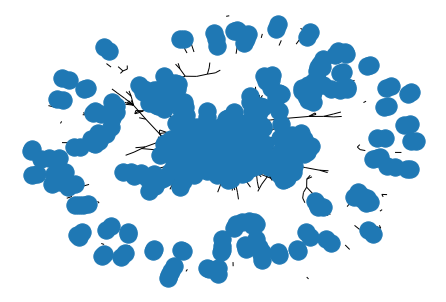

In [42]:
nx.draw(G)
nx.draw_networkx_edges(G,pos=pos)
plt.show()